In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

%matplotlib inline

In [2]:
with nc.Dataset('/data/eolson/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as mesh:
    tmask=mesh.variables['tmask'][:,:,:,:]

In [4]:
!ls /data/sallen/results/MEOPAR/202007/202007D-nociliates

myncra.sh
myncra.sh~
SalishSea_1d_20150101_20150105_grid_T_20150101-20150101.nc
SalishSea_1d_20150101_20150105_grid_T_20150102-20150102.nc
SalishSea_1d_20150101_20150105_grid_T_20150103-20150103.nc
SalishSea_1d_20150101_20150105_grid_T_20150104-20150104.nc
SalishSea_1d_20150101_20150105_grid_T_20150105-20150105.nc
SalishSea_1d_20150101_20150105_ptrc_T_20150101-20150101.nc
SalishSea_1d_20150101_20150105_ptrc_T_20150102-20150102.nc
SalishSea_1d_20150101_20150105_ptrc_T_20150103-20150103.nc
SalishSea_1d_20150101_20150105_ptrc_T_20150104-20150104.nc
SalishSea_1d_20150101_20150105_ptrc_T_20150105-20150105.nc
SalishSea_1d_20150106_20150110_grid_T_20150106-20150106.nc
SalishSea_1d_20150106_20150110_grid_T_20150107-20150107.nc
SalishSea_1d_20150106_20150110_grid_T_20150108-20150108.nc
SalishSea_1d_20150106_20150110_grid_T_20150109-20150109.nc
SalishSea_1d_20150106_20150110_grid_T_20150110-20150110.nc
SalishSea_1d_20150106_20150110_ptrc_T_20150106-20150106.nc
SalishSea_1d_20150106_20150110_ptrc

In [8]:
f0=nc.Dataset('/data/sallen/results/MEOPAR/202007/202007D-nociliates/SalishSea_1d_20150101_20150105_ptrc_T_20150101-20150101.nc')

In [9]:
f0.variables['ciliates']

<class 'netCDF4._netCDF4.Variable'>
float32 ciliates(time_counter, deptht, y, x)
    standard_name: mole_concentration_of_mesodinium_rubrum_expressed_as_nitrogen_in_sea_water
    long_name: Mesodinium rubrum Concentration
    units: mmol m-3
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 d
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered deptht nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (1, 40, 898, 398)
filling on

In [10]:
np.max(np.ma.masked_where(tmask==0,f0.variables['ciliates']))

4.162322e-07

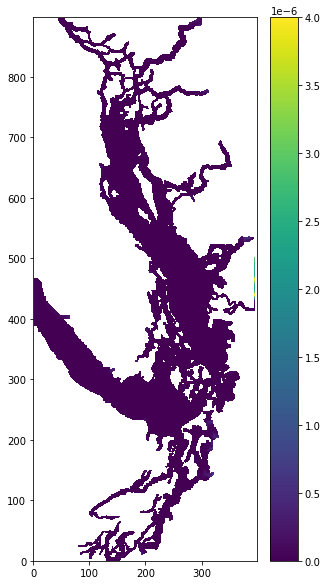

In [16]:
fig,ax=plt.subplots(1,1,figsize=(5,10))
m=ax.pcolormesh(np.sum(np.ma.masked_where(f0.variables['ciliates'][0,:,:,:]==0,
                                        f0.variables['ciliates'][0,:,:,:]),0))
plt.colorbar(m)

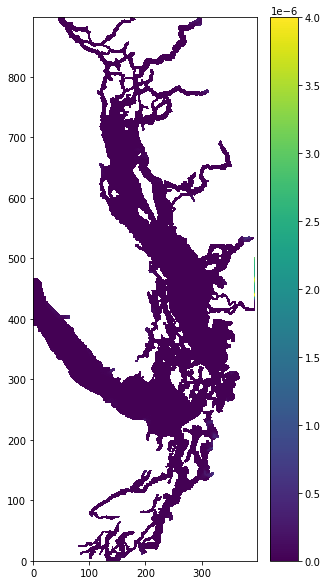

In [17]:
fig,ax=plt.subplots(1,1,figsize=(5,10))
m=ax.pcolormesh(np.sum(np.ma.masked_where(tmask[0,:,:,:]==0,
                                        f0.variables['ciliates'][0,:,:,:]),0))
plt.colorbar(m)

In [21]:
friv=nc.Dataset('/results/forcing/rivers/R201702DFraCElse_y2015m01d01.nc')

In [23]:
friv.variables['rorunoff']

<class 'netCDF4._netCDF4.Variable'>
float32 rorunoff(time_counter, y, x)
    _Fillvalue: 0.0
    _missing_value: 0.0
    _units: kg m-2 s-1
unlimited dimensions: time_counter
current shape = (1, 898, 398)
filling on, default _FillValue of 9.969209968386869e+36 used

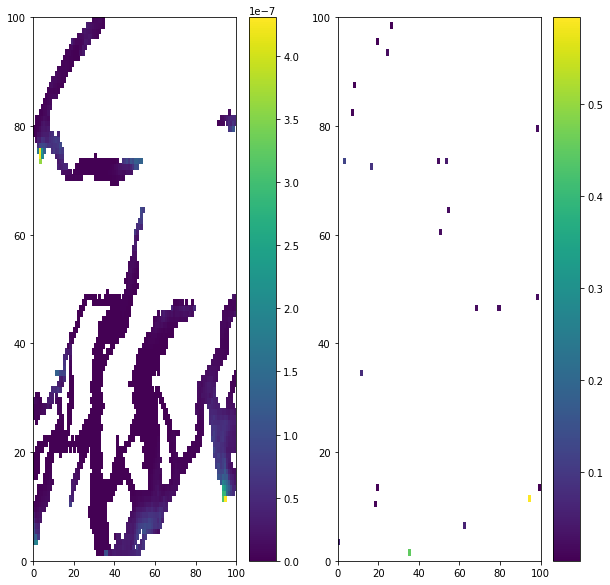

In [26]:
fig,ax=plt.subplots(1,2,figsize=(10,10))
m=ax[0].pcolormesh(np.sum(np.ma.masked_where(tmask[0,:,:100,100:200]==0,
                                        f0.variables['ciliates'][0,:,:100,100:200]),0))
plt.colorbar(m,ax=ax[0])
m=ax[1].pcolormesh(np.ma.masked_where(friv.variables['rorunoff'][0,:100,100:200]==0,
                                        friv.variables['rorunoff'][0,:100,100:200]))
plt.colorbar(m,ax=ax[1])

In [27]:
f2=nc.Dataset('/data/sallen/results/MEOPAR/202007/202007D-nociliates/SalishSea_1d_20150516_20150520_ptrc_T_20150518-20150518.nc')

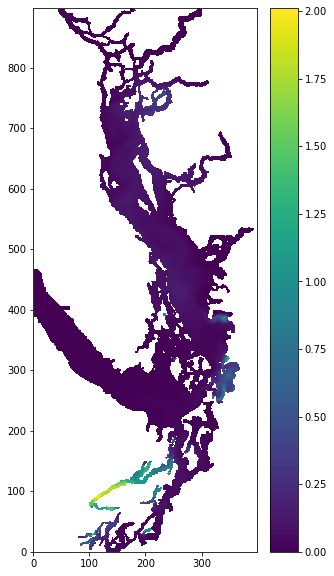

In [28]:
fig,ax=plt.subplots(1,1,figsize=(5,10))
m=ax.pcolormesh(np.sum(np.ma.masked_where(f2.variables['ciliates'][0,:,:,:]==0,
                                        f2.variables['ciliates'][0,:,:,:]),0))
plt.colorbar(m)